In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Loading & processing the dataset

In [11]:
data = pd.read_csv(r"E:\titanic\train.csv")

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.shape

(891, 12)

In [15]:
# To check information of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
# To check null/ missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
data = data.drop(columns='Cabin', axis=1)

In [20]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [22]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [23]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [25]:
# To check duplicate value
data.duplicated().sum()

0

## Analysis the data

In [28]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
#To check How many survived  ## 1 means survived and 0 means not survived
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [29]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

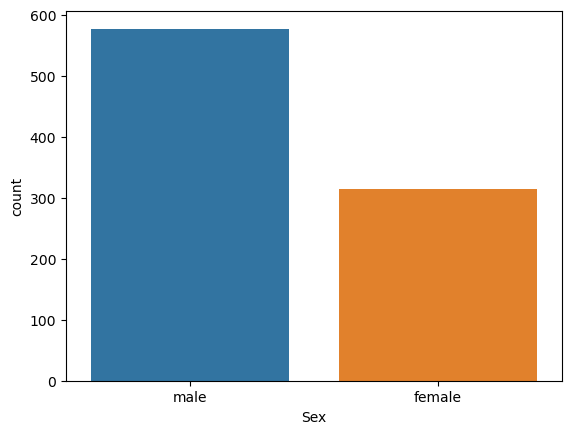

In [41]:
sns.countplot(x='Sex',data=data)
plt.show()

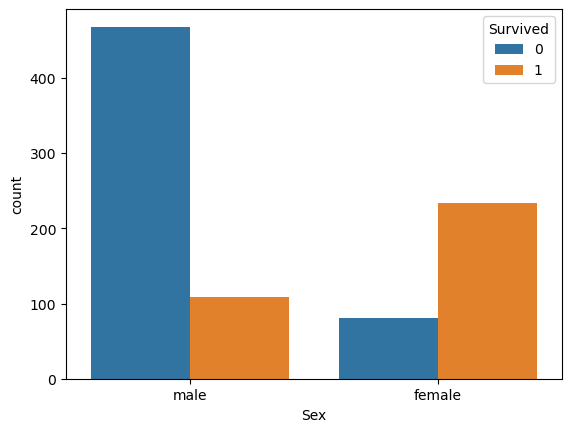

In [42]:
# Analysis Gender wise survived
sns.countplot(x='Sex',hue='Survived', data=data)
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

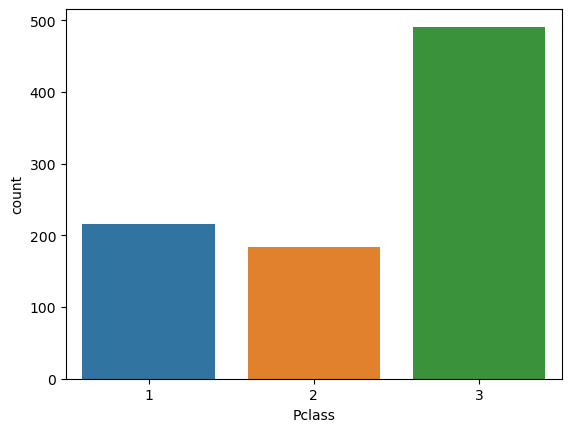

In [43]:
# Analysis Class wise
sns.countplot(x='Pclass', data=data)
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

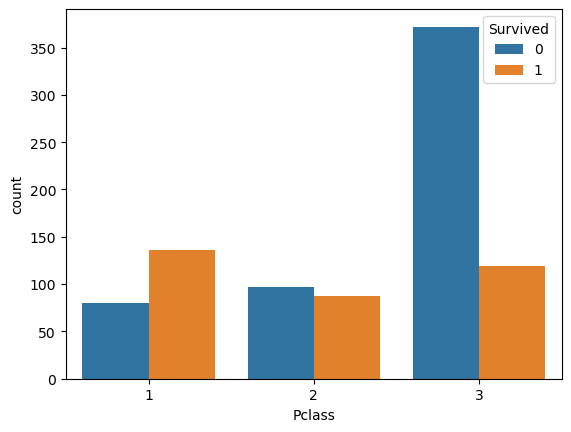

In [44]:
sns.countplot(x='Pclass', hue= 'Survived', data=data)

In [45]:
# Encoding 
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()

In [51]:
data['Sex'] = le.fit_transform(data['Sex'])

In [53]:
data['Embarked'] =le.fit_transform(data['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Embarked, Length: 891, dtype: int64

In [55]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [56]:
x = data.drop(columns={'PassengerId','Survived','Name','Ticket'},axis=1)
y = data['Survived']

In [57]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,1
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,0
3,1,0,35.000000,1,0,53.1000,0
4,3,1,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,1
887,1,0,19.000000,0,0,30.0000,0
888,3,0,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [58]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [59]:
# Training the data
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=13)

In [73]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
711,1,1,29.699118,0,0,26.5500,1
525,3,1,40.500000,0,0,7.7500,1
76,3,1,29.699118,0,0,7.8958,1
626,2,1,57.000000,0,0,12.3500,1
159,3,1,29.699118,8,2,69.5500,1
...,...,...,...,...,...,...,...
742,1,0,21.000000,2,2,262.3750,0
528,3,1,39.000000,0,0,7.9250,1
74,3,1,32.000000,0,0,56.4958,1
176,3,1,29.699118,3,1,25.4667,1


## Regression model 

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr =LogisticRegression()

In [76]:
lr.fit(x_train,y_train)

LogisticRegression()

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import *

In [77]:
# Train Data prediction
x_train_pred=lr.predict(x_train)

In [78]:
accuracy_score(y_train,x_train_pred)

0.7879213483146067

In [79]:
#Test data prediction

x_test_pred=lr.predict(x_test)

In [80]:
accuracy_score(y_test,x_test_pred)

0.8100558659217877

## Build predictive model

In [85]:
# Here input the x_train features
input_data = (3,1,30,0,0,200,1)

# change the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the numpy array 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)

print(prediction)


if (prediction[0]==0):
    print('The person does not survived')
else:
    print('The person survived')
    

[0]
The person does not survived


C:\Users\Arbaz\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
